In [2]:
import numpy as np
from graphqec import CssCode, ThresholdLAB

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix, hstack, kron, eye

def repetition_code(n):
    """
    Parity check matrix of a repetition code with length n.
    """
    row_ind, col_ind = zip(*((i, j) for i in range(n) for j in (i, (i+1)%n)))
    data = np.ones(2*n, dtype=np.uint8)
    return csc_matrix((data, (row_ind, col_ind)))


def toric_code_stabilisers(L1, L2):
    """
    Sparse check matrix for the X stabilisers of a toric code with
    lattice size L, constructed as the hypergraph product of
    two repetition codes.
    """
    Hr1 = repetition_code(L1)
    Hr2 = repetition_code(L2)
    Hx= hstack(
            [kron(Hr1, eye(Hr2.shape[1])), kron(eye(Hr1.shape[0]), Hr2.T)],
            dtype=np.uint8
        )
    Hx.data = Hx.data % 2
    Hx.eliminate_zeros()
    
    Hz= hstack(
            [kron(eye(Hr1.shape[0]), Hr2), kron(Hr1.T, eye(Hr2.shape[1]))],
            dtype=np.uint8
        )
    Hz.data = Hz.data % 2
    Hz.eliminate_zeros()
    return Hx, Hz

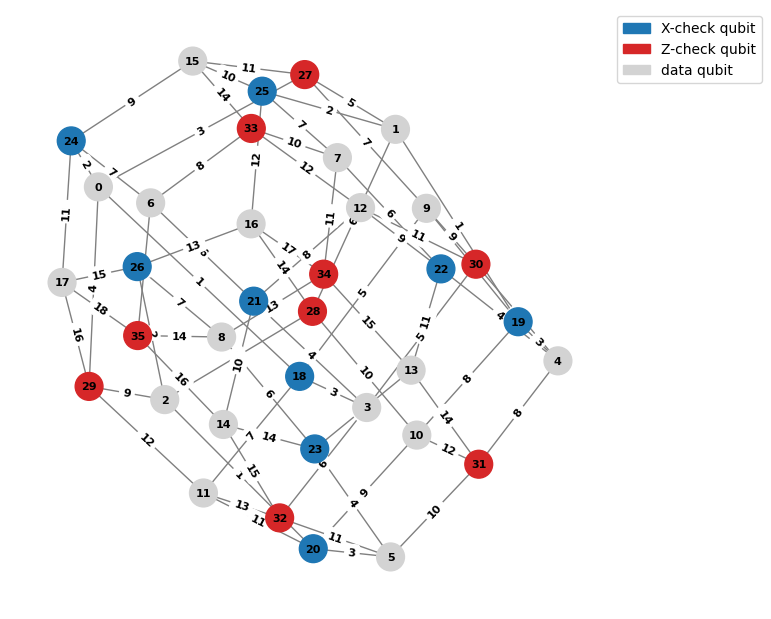

In [4]:
l = 3
Hx, Hz = toric_code_stabilisers(l, l)
Hx = np.asarray(Hx.todense())
Hz = np.asarray(Hz.todense())

tc = CssCode(Hx, Hz, name="Toric")

tc.draw_graph()

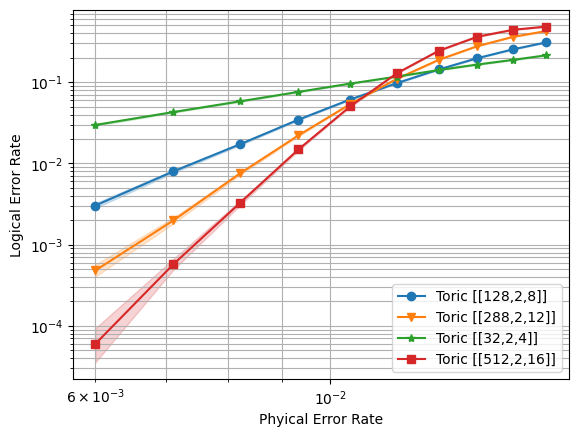

In [11]:
configurations = []

for l in [4, 8, 12,16]:
    Hx, Hz = toric_code_stabilisers(l, l)
    Hx = np.asarray(Hx.todense())
    Hz = np.asarray(Hz.todense())
    configurations.append({"Hx": Hx, "Hz": Hz, "name": f"Toric"})

th = ThresholdLAB(
    configurations = configurations,
    code = CssCode,
    error_rates = np.linspace(0.006, 0.016, 10),
    decoder='pymatching'
)

th.collect_stats(
    num_workers = 8,
    max_shots = 10**6,
    max_errors= 10**5,
    logic_check="Z"
)

th.plot_stats()

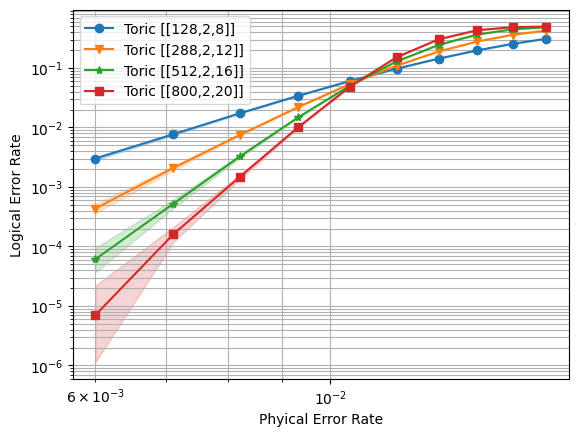

In [5]:
configurations = []

for l in [8, 12,16,20]:
    Hx, Hz = toric_code_stabilisers(l, l)
    Hx = np.asarray(Hx.todense())
    Hz = np.asarray(Hz.todense())
    configurations.append({"Hx": Hx, "Hz": Hz, "name": f"Toric"})

th = ThresholdLAB(
    configurations = configurations,
    code = CssCode,
    error_rates = np.linspace(0.006, 0.016, 10),
    decoder='pymatching'
)

th.collect_stats(
    num_workers = 4,
    max_shots = 10**6,
    max_errors= 10**5,
    logic_check="Z"
)

th.plot_stats()

In [6]:
th.samples

[sinter.TaskStats(strong_id='9227a497dcaa489055a8e72ee7c03bf6fa15fd0b5f0c0324cfa702e4c46b25fc', decoder='pymatching', json_metadata={'name': 'Toric [[128,2,8]]', 'error': 0.0071111111111111115}, shots=1000000, errors=7688, seconds=69.68599999997241),
 sinter.TaskStats(strong_id='4d358bf16087b396bfb07fc214c3108cd5c88dd615aad86b86fd10eef954d2b9', decoder='pymatching', json_metadata={'name': 'Toric [[128,2,8]]', 'error': 0.008222222222222223}, shots=1000000, errors=17380, seconds=87.04799999998068),
 sinter.TaskStats(strong_id='c8d5af395ca94a4880864dd6d4c949b54074ec5b1bc435bbe57d8f4a87dbdc19', decoder='pymatching', json_metadata={'name': 'Toric [[128,2,8]]', 'error': 0.009333333333333332}, shots=1000000, errors=34126, seconds=105.87599999997474),
 sinter.TaskStats(strong_id='4eb08dca120c747ac998a34a6ce3a967ad1d6c25f9ea4a40a623d7e7c2bc2b0c', decoder='pymatching', json_metadata={'name': 'Toric [[128,2,8]]', 'error': 0.006}, shots=1000000, errors=3000, seconds=54.53199999999197),
 sinter.Tas